In [49]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
prefix = './coffea/skimmed/'
suffix = 'VR_Collinear_fromPV_refit_HEMvetos_good_vtx_v9_trackdxy'

In [51]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [52]:
# Data
data_histo = util.load(f'{prefix}/data_{suffix}.coffea')[0]

In [53]:
bkg_histo.keys()

dict_keys(['sel_e1_dxy', 'sel_e1_trkVtxVx', 'sel_e1_trkVtxVy', 'sel_e1_trkVtxPx', 'sel_e1_trkVtxPy', 'sel_e1_trkVtxPt', 'sel_e1_trkVtxPVposx', 'sel_e1_trkVtxPVposy', 'sel_e1_trkVtxDxyFromPV', 'sel_e1_dxy_refit', 'sel_e2_dxy', 'sel_e2_trkVtxVx', 'sel_e2_trkVtxVy', 'sel_e2_trkVtxPx', 'sel_e2_trkVtxPy', 'sel_e2_trkVtxPt', 'sel_e2_trkVtxPVposx', 'sel_e2_trkVtxPVposy', 'sel_e2_trkVtxDxyFromPV', 'sel_e2_dxy_refit', 'sel_e_lead_dxy', 'sel_e_sub_dxy', 'sel_e_lead_dxy_refit', 'sel_e_sub_dxy_refit', 'PVx', 'PVy', 'sel_vtx_vxy1', 'sel_vtx_vxy10', 'sel_vtx_vxy100', 'sel_vtx_vxy1_fromPV_vectorSub', 'sel_vtx_CosThetaColl', 'sel_vtx_CosThetaColl_fromPV', 'sel_vtx_CosThetaColl_fromPV_refit', 'sel_vtx_CosThetaColl_fromPV_refit_vs_sel_e_lead_dxy', 'sel_vtx_CosThetaColl_fromPV_refit_vs_sel_e_sub_dxy', 'sel_vtx_CosThetaColl_fromPV_refit_vs_sel_e_lead_dxy_refit', 'sel_vtx_CosThetaColl_fromPV_refit_vs_sel_e_sub_dxy_refit', 'sel_vtx_min_dxy', 'sel_vtx_min_dxy_refit', 'sel_e1_trkVtxVxMinusBSx', 'sel_e1_trkVtx

In [54]:
bkg_histo['sel_e_lead_dxy_refit']

Hist(
  StrCategory(['bkg_2018_ZJets_ZJetsNuNu_HT800to1200', 'bkg_2018_ZJets_ZJetsNuNu_HT400to600', 'bkg_2018_ZJets_ZJetsNuNu_HT2500toInf', 'bkg_2018_ZJets_ZJetsNuNu_HT600to800', 'bkg_2018_ZJets_ZJetsNuNu_HT1200to2500', 'bkg_2018_ZJets_ZJetsNuNu_HT200to400', 'bkg_2018_ZJets_ZJetsNuNu_HT100to200', 'bkg_2018_ZGamma_ZGToLLG', 'bkg_2018_ZGamma_ZGToNuNuG', 'bkg_2018_ZGamma_ZG2JTo2L2JG', 'bkg_2018_WJets_WJetsLNu_HT600to800', 'bkg_2018_WJets_WJetsLNu_HT800to1200', 'bkg_2018_WJets_WJetsLNu_HT200to400', 'bkg_2018_WJets_WJetsLNu_HT400to600', 'bkg_2018_WJets_WJetsLNu_HT2500toInf', 'bkg_2018_WJets_WJetsLNu_HT100to200', 'bkg_2018_WJets_WJetsLNu_HT1200to2500', 'bkg_2018_TTbar_TTToSemiLeptonic', 'bkg_2018_TTbar_TTToHadronic', 'bkg_2018_TTX_TTZToQQ', 'bkg_2018_TTbar_TTTo2L2Nu', 'bkg_2018_TTX_TTWJetsToQQ', 'bkg_2018_SingleTop_ST_tW_top', 'bkg_2018_TTX_TTGJets', 'bkg_2018_SingleTop_ST_tW_antitop', 'bkg_2018_SingleTop_ST_t-channel_top', 'bkg_2018_TTX_TTWJetsToLNu', 'bkg_2018_SingleTop_ST_t-channel_antito

In [7]:
variable = 'sel_e_lead_dxy_refit'
cut = 'cut9'

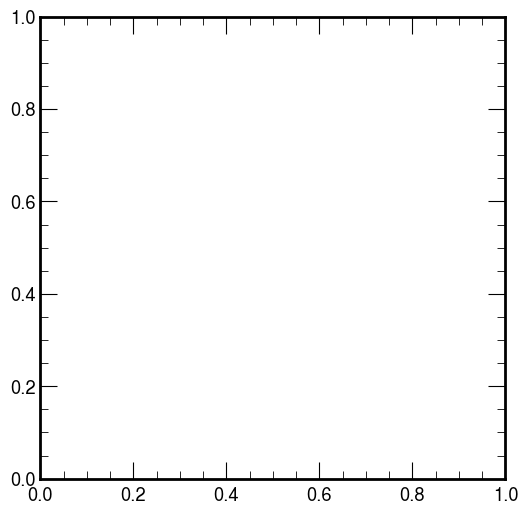

In [8]:
fig, ax = plt.subplots(figsize=(6,6))


In [9]:
style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Data',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}


In [10]:
# Plot settings
plot_dict = {
    'variable': variable,
    'cut': cut,
    'year': 2018
}

ptools.get_bkg_histo_stacked_1d(bkg_histo, plot_dict, style_dict).sum().value

1298.9432909326206

In [11]:
style_dict['xlim'] = [0.01, 10]
ptools.get_bkg_histo_stacked_1d(bkg_histo, plot_dict, style_dict).sum().value

416.89633674432116

In [12]:
ptools.get_data_histo_1d(data_histo, plot_dict, style_dict).sum().value

462.0

In [77]:
yield_bkg = []
yield_data = []

range_scan_mindxy = np.arange(0,0.01,0.0001)

data_over_mc = []

for idx, epsil in enumerate(range_scan_mindxy):
    style_dict['xlim'] = [epsil, 10]
    yield_bkg.append(ptools.get_bkg_histo_stacked_1d(bkg_histo, plot_dict, style_dict).sum().value)
    yield_data.append(ptools.get_data_histo_1d(data_histo, plot_dict, style_dict).sum().value)

    data_over_mc.append(yield_data[idx]/yield_bkg[idx])


KeyboardInterrupt



In [ ]:
data_over_mc

In [ ]:
yield_data

In [ ]:
yield_bkg

In [60]:
variable = 'sel_vtx_CosThetaColl_fromPV_refit_vs_sel_e_lead_dxy'

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': False,
    'outDir': f'./plots/{suffix}/data/sel_vtx/',
    'outName': f'data_VR_{variable}_{cut}.png'
}

In [61]:
ptools.get_data_histo_2D(data_histo, plot_dict, style_2d_dict).sum().value

1439.0

In [62]:
ptools.get_bkg_histo_2D(bkg_histo, plot_dict, style_2d_dict).sum().value

10361.184031717581

In [64]:
plot_dict['cut'] = 'cut10'
#style_2d_dict['xlim'] = [0,10]
ptools.get_data_histo_2D(data_histo, plot_dict, style_2d_dict)

Hist(Regular(5000, 0, 5, name='dxy'), storage=Weight()) # Sum: WeightedSum(value=702, variance=702) (WeightedSum(value=936, variance=936) with flow)

In [ ]:
variable = 'sel_vtx_CosThetaColl_fromPV_refit_vs_sel_e_lead_dxy_refit'

In [ ]:
ptools.get_data_histo_2d(data_histo, plot_dict, style_2d_dict)

In [ ]:
ptools.get_bkg_histo_2d(bkg_histo, plot_dict, style_2d_dict)